# Order of Integration for Wave Equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_data(filename):
    raw_data = np.genfromtxt(filename, unpack=True, skip_header=2)
    data = {}
    cols = ["cfl", "Phi error", "Pi error"]
    for ci, di in zip(cols, raw_data):
        data[ci] = di
    # Convert actual CFL to CFL ratio wrt. first (assumed largest) CFL
    data["cfl"] = data["cfl"]/data["cfl"][0]
    return data

In [3]:
data_fe = get_data("fe/errors.txt")

In [4]:
data_rk_fe = get_data("rk_fe/errors.txt")

In [5]:
data_rk4 = get_data("rk4/errors.txt")

In [6]:
def analytic_order_curve(cfl, error, order):
    error_at_order = error[0] * (cfl)**order # Because we read cfl = cfl/cfl[0] we don't have to normalize here
    return error_at_order

In [7]:
def plot_order(variable):
    fig, ax = plt.subplots()
    ax.invert_xaxis()
    ax.set_yscale("log")
    ax.set_xscale("log")
    ax.set_xlabel("CFL Ratio")
    ax.set_ylabel(variable)

    ax.plot(data_fe["cfl"], data_fe[variable], "x", color="blue", alpha=0.5, label="FE")
    ax.plot(data_rk_fe["cfl"], data_rk_fe[variable], "o", color="orange", alpha=0.5, label="RK FE")
    ax.plot(data_rk4["cfl"], data_rk4[variable], "o", color="green", alpha=0.5, label="RK4")

    analytic_error_fe = analytic_order_curve(data_fe["cfl"], data_fe[variable], 1)
    ax.plot(data_fe["cfl"], analytic_error_fe, "-", color="blue", alpha=0.5, label="$m=1$")

    analytic_error_rk4 = analytic_order_curve(data_rk4["cfl"], data_rk4[variable], 4)
    ax.plot(data_rk4["cfl"], analytic_error_rk4, "-", color="green", alpha=0.5, label="$m=4$")

    ax.legend()

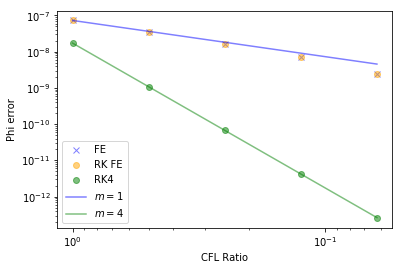

In [8]:
plot_order("Phi error")

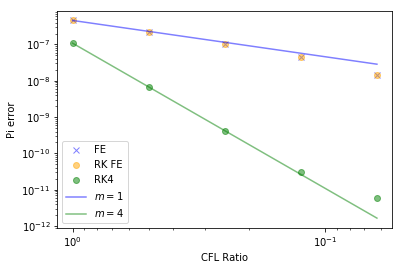

In [9]:
plot_order("Pi error")